<a href="https://colab.research.google.com/github/fernandallobao/ML_Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 2

Faça a investigação dos dados contidos no dataset de treino ("train"). Você pode tanto utilizar um notbook Jupyter local em seu equipamento ou utilizar o "Google Colaboratory". Use e abuse das redes generativas (Chat-GPT, Gemini, Co-Pilot, Claude e outras) para auxiliar na análise.

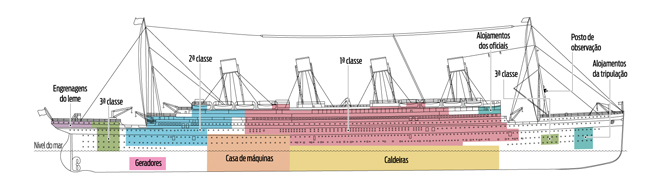

Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analise inicial

In [ ]:
print("Informações:")
df.info()

Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print("\nDados ausentes:")
df.isnull().sum()


Dados ausentes:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
print("\nEstatísticas descritivas:")
df.describe()


Estatísticas descritivas:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Número de sobreviventes

In [ ]:
agrupado = df.groupby(['Survived']).size()
agrupado

,0
Survived,
0,549
1,342


De acrodo com a documnetação:

- Sobreviventes 1
- Não sobreviventes 0

Vizualizando com gráficos

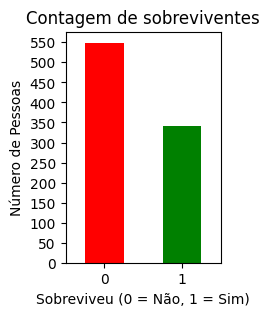

In [ ]:
# prompt: grafico dos sobreviventes

import matplotlib.pyplot as plt

# Número de sobreviventes com o dataset sem tratamento
agrupado = df.groupby(['Survived']).size()

# Criando o gráfico de barras
plt.figure(figsize=(2, 3))
agrupado.plot(kind='bar', color=['red', 'green'])
plt.title('Contagem de sobreviventes')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Número de Pessoas')
plt.yticks(range(0, 600, 50))
plt.xticks(rotation=0)  # Rotaciona os labels do eixo x para melhor visualização
plt.show()


In [ ]:
agrupado = df.groupby(['Embarked']).size()
agrupado

,0
Embarked,
C,168
Q,77
S,644




---



**Tratamento de embarcados**

- foi verificado os dados que estavam com N/A
- Verificou-se a moda
- substituição feita com o resultado da moda


In [ ]:
#filtragem de embarcados com valore nulos
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
#verificação da moda
agrupado = df.groupby(['Embarked']).size()
agrupado

,0
Embarked,
C,168
Q,77
S,644


In [ ]:
#fazendo a subistituição dos valores nulos pela moda
df['Embarked'].fillna('S', inplace=True)

<ipython-input-501-ec6aa81e5034>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [ ]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked




---


**Tratando a idade**

- verificando N/A
- media total da idade feminina
- media total da idade masculina
- ordenamento da idade menor-maior

In [ ]:
df[df.Age.isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


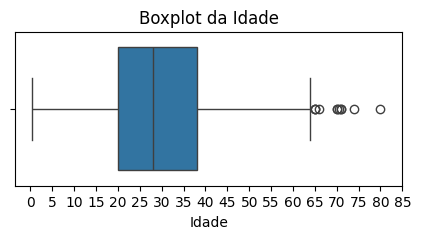

In [ ]:
# prompt: boxplot da idade

# Plotando o boxplot da idade
plt.figure(figsize=(5, 2))
sns.boxplot(x='Age', data=df)
plt.title('Boxplot da Idade')
plt.xlabel('Idade')
plt.xticks(np.arange(0, 90, 5))
plt.show()


In [ ]:
age_outlier = df[df.Age > 65]
age_outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
#filtragem de valor faltantes por classe
pri_age_null = len(df[(df.Age.isnull()) & (df.Pclass == 1)])
seg_age_null = len(df[(df.Age.isnull()) & (df.Pclass == 2)])
ter_age_null = len(df[(df.Age.isnull()) & (df.Pclass == 3)])
print(f"Linhas primeira: {pri_age_null}")
print(f"Linhas segunda: {seg_age_null}")
print(f"Linhas terceira: {ter_age_null}")

Linhas primeira: 30
Linhas segunda: 11
Linhas terceira: 136


In [ ]:
media_idade = df.Age.mean()
print(f'Idade média total: {media_idade}')

Idade média total: 29.69911764705882


In [ ]:
media_idade_mulheres = df[df.Sex == 'female'].Age.mean()
media_idade_mulheres

27.915708812260537

In [ ]:
#media de idade por classe e sexo
media_idade_f_pri = df[(df.Sex == 'female') & (df.Pclass == 1)].Age.mean()
media_idade_f_seg = df[(df.Sex == 'female') & (df.Pclass == 2)].Age.mean()
media_idade_f_ter = df[(df.Sex == 'female') & (df.Pclass == 3)].Age.mean()
print(f'Primeira: {media_idade_f_pri}')
print(f'segunda: {media_idade_f_seg}')
print(f'terceira: {media_idade_f_ter}')

Primeira: 34.61176470588235
segunda: 28.722972972972972
terceira: 21.75


In [ ]:
#preenchendo a idade das mulheres por classe
df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.Age.isnull()), 'Age'] = media_idade_f_pri
df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.Age.isnull()), 'Age'] = media_idade_f_seg
df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.Age.isnull()), 'Age'] = media_idade_f_ter

In [ ]:
media_idade_homens = df[df.Sex == 'male'].Age.mean()
media_idade_homens

30.72664459161148

In [ ]:
#media idade homem menores q 65
average_age_men_under_65 = df[(df['Sex'] == 'male') & (df['Age'] < 65)]['Age'].mean()

print(f"Média de idade dos homens menores que 65 anos: {average_age_men_under_65}")


Média de idade dos homens menores que 65 anos: 29.754909502262443


In [ ]:
#media de idade por classe e sexo
media_idade_m_pri = df[(df.Sex == 'male') & (df.Pclass == 1)].Age.mean()
media_idade_m_seg = df[(df.Sex == 'male') & (df.Pclass == 2)].Age.mean()
media_idade_m_ter = df[(df.Sex == 'male') & (df.Pclass == 3)].Age.mean()
print(f'Primeira: {media_idade_m_pri}')
print(f'segunda: {media_idade_m_seg}')
print(f'terceira: {media_idade_m_ter}')

Primeira: 41.28138613861386
segunda: 30.74070707070707
terceira: 26.507588932806325


In [ ]:
#preenchendo a idade dos homens por classe
df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.Age.isnull()), 'Age'] = media_idade_m_pri
df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.Age.isnull()), 'Age'] = media_idade_m_seg
df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.Age.isnull()), 'Age'] = media_idade_m_ter

In [ ]:
#filtragem de valores faltantes por classe depois das modificações
pri_age_null = len(df[(df.Age.isnull()) & (df.Pclass == 1)])
seg_age_null = len(df[(df.Age.isnull()) & (df.Pclass == 2)])
ter_age_null = len(df[(df.Age.isnull()) & (df.Pclass == 3)])
print(f"Linhas primeira: {pri_age_null}")
print(f"Linhas segunda: {seg_age_null}")
print(f"Linhas terceira: {ter_age_null}")

Linhas primeira: 0
Linhas segunda: 0
Linhas terceira: 0


#Tratamento da coluna Cabin

- Verificar NaN
- Fazer filtragem por classe
- Verificar a moda

In [ ]:
#moda primeira classe
df[df.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.750000,1,2,W./C. 6607,23.4500,NaN,S


Filtrando por classe e tirando a moda

In [ ]:
pri_age_null = len(df[df.Cabin.isnull() & (df.Pclass == 1)])
seg_age_null = len(df[df.Cabin.isnull() & (df.Pclass == 2)])
ter_age_null = len(df[df.Cabin.isnull() & (df.Pclass == 3)])
print(f"Linhas primeira: {pri_age_null}")
print(f"Linhas segunda: {seg_age_null}")
print(f"Linhas terceira: {ter_age_null}")

Linhas primeira: 40
Linhas segunda: 168
Linhas terceira: 479


In [ ]:
#tirando a moda das cabines por classe
moda_pri = df[df.Pclass == 1].Cabin.mode()
moda_seg = df[df.Pclass == 2].Cabin.mode()
moda_ter = df[df.Pclass == 3].Cabin.mode()
print(f'Primeira: {moda_pri}')
print('\n')
print(f'Segunda: {moda_seg}')
print('\n')
print(f'Terceira: {moda_ter}')

Primeira: 0        B96 B98
1    C23 C25 C27
Name: Cabin, dtype: object


Segunda: 0       D
1    E101
2      F2
3     F33
Name: Cabin, dtype: object


Terceira: 0    G6
Name: Cabin, dtype: object


Aqui temos a moda de cada classe em ordem alfabética.

Fazendo a substituição.

In [ ]:
#subistitindo os NaN do cabin pela moda da classe
df.loc[(df.Pclass == 1) & (df.Cabin.isnull()), 'Cabin'] = 'B96 B98'
df.loc[(df.Pclass == 2) & (df.Cabin.isnull()), 'Cabin'] = 'D'
df.loc[(df.Pclass == 3) & (df.Cabin.isnull()), 'Cabin'] = 'G96'

#verificando se ainda tem NaN
pri_age_null = len(df[df.Cabin.isnull() & (df.Pclass == 1)])
seg_age_null = len(df[df.Cabin.isnull() & (df.Pclass == 2)])
ter_age_null = len(df[df.Cabin.isnull() & (df.Pclass == 3)])
print(f"Linhas primeira: {pri_age_null}")
print(f"Linhas segunda: {seg_age_null}")
print(f"Linhas terceira: {ter_age_null}")

Linhas primeira: 0
Linhas segunda: 0
Linhas terceira: 0


#Dropando colunas irrelevantes

Decidi retirar apenas a coluna PassengerId por considerar irrelevante, acredito que com as outras podem ajudar com o entendimento mais profundo do motivo que levou algumas pessoas a sobreviverem.

In [ ]:
#dropando a coluna PassengerId
df = df.drop('PassengerId', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G96,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G96,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G96,S


#Salvando CSV

In [ ]:
#dando so mais uma conferida
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G96,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G96,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G96,S


In [ ]:
# Salvan dataset limpo
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/train_limpo.csv', index=False)